# Capstone Project: Optimizing FPL Success with Predictive Analysis
## Author: Mu-izz Gbadamosi

## Date: December 14, 2023

---
# Fantasy Premier League Data Modelling
Fantasy Premier League (FPL) is an engaging platform where users can create their dream football teams and earn points based on the real-life performance of players in the English Premier League. Predicting the total points a player might accumulate throughout the season can be a valuable asset for FPL managers. This project aims to build a predictive model that forecasts the total points a player is likely to score in the Fantasy Premier League.

FPL player performance is influenced by various factors such as player statistics, team dynamics, fixtures, and environmental conditions (e.g., weather, injuries). Analyzing historical FPL data can unveil patterns and correlations that contribute to predicting future player performance.

In the previous exploratory data analysis (EDA) notebook, we delved into the dataset, uncovered insights, and identified patterns. Now, we transition to the modeling phase, where we'll employ various regression models such as Linear Regression, Non-Linear Regression, Neural Network, and Decision Tree. Our objective is to predict the `total_points`, treating it as the target variable.

Our approach is to use several individual models to predict the total points directly, considering all relevant independent variables.

Our model evaluation framework involves metrics like Mean Absolute Error (MAE), R-squared, and Adj-R-squared. K-fold cross-validation will assess the generalization performance of our models. By comparing different approaches, we aim to identify the most effective model for predicting FPL player performance.

As we progress, we'll refine our models and assess their robustness, ensuring their practical applicability in the dynamic world of Fantasy Premier League.


## Objective:
We will be performing a thorough preprocessing and modelling of our dataset. We will perform Regression models (Linear and Non Linear Regression), Neural Network, Decision Tree and other models for predicting our target variable `total_points`. We will use concepts like PMAE, R-squared and Adjusted R-squared to make an informed decision on the best model.

## Data Source:
We will be reviewing the FPL data for the 2022/2023 season for each player over the course of 38 gameweeks. This data was obtained from:
Anand, Vaastav. (2023). FPL Historical Dataset. https://github.com/vaastav/Fantasy-Premier-League/.

## Data Dictionary

| Column Name                | Description                                                                                                                                                                         |
|----------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| name                       | A player's name                                                                                                                                                                     |
| position                   | A player's position                                                                                                                                                                 |
| team                       | The team a player belongs to                                                                                                                                                        |
|                         xP | Expected points calculated by FPL (what we will try to beat in modelling)                                                                                                           |
| assists                    | The number of passes in a game a player made that directly contributed to a goal                                                                                                    |
| bonus                      | The number of bonus points a player earned in a game                                                                                                                                |
| bps                        | The number of points earned through the bonus points system in FPL                                                                                                                  |
| clean_sheets               | Has a player successfully prevented the opposing team from scoring                                                                                                                  |
| creativity                 | Creativity assesses player performance in terms of producing goalscoring opportunities for others. It can be used as a guide to identify the players most likely to supply assists. |
| element                    | Indicates a player's position in ordinal format                                                                                                                                     |
| expected_assists           | A statistic that measures the number of assists that a player was expected to have returned in a match.                                                                             |
| expected_goal_involvements | A statistic that measures both the number of goals and assists that a team or player were expected to return in a Gameweek                                                          |
| expected_goals             | A statistic that measures both the quantity and quality of shots, based on how often each is normally a goal                                                                        |
| expected_goals_conceded    | This is the expected number of goals that a defence is expected to concede                                                                                                          |
| fixture                    | The game number in Premier League                                                                                                                                                   |
| goals_conceded             | The number of goals conceded by a player's team                                                                                                                                     |
| goals_scored               | The number of goals scored by a player's team                                                                                                                                       |
| ict_index                  | All three of influence, creativity, and threat scores are combined to create an overall ICT Index score                                                                             |
| influence                  | Influence evaluates the degree to which a player has made an impact on a single match or throughout the season                                                                      |
| kickoff_time               | The date and time that a match was played                                                                                                                                           |
| minutes                    | The number of minutes a player was on the pitch                                                                                                                                     |
| opponent_team              | The opposition team in number format                                                                                                                                                |
| own_goals                  | A goal scored inadvertently when the ball is struck into the goal by a player on the defensive team                                                                                 |
| penalties_missed           | The number of penalties that a player missed in a match                                                                                                                             |
| penalties_saved            | The number of penalties saved by a goalkeeper                                                                                                                                       |
| red_cards                  | If a player was sent off in a match by receiving a red card                                                                                                                         |
| round                      | The round or Gameweek that a match was played                                                                                                                                       |
| saves                      | The number of saves made by a goalkeeper                                                                                                                                            |
| selected                   | The number of FPL teams that have selected the player                                                                                                                               |
| starts                     | Indicating if the player was on the starting XI                                                                                                                                     |
| team_a_score               | The number of goals scored by the away team                                                                                                                                         |
| team_h_score               | The number of goals scored by the home team                                                                                                                                         |
| threat                     | This is a value that examines a player's threat on goal. It gauges the individuals most likely to score goals.                                                                      |
| total_points               | The number of FPL points earned in a gameweek                                                                                                                                       |
| transfers_balance          | The net transfers to FPL teams for a player                                                                                                                                         |
| transfers_in               | The number of transfers into FPL teams                                                                                                                                              |
| transfers_out              | The number of transfers out of FPL teams                                                                                                                                            |
| value                      | The cost of a player                                                                                                                                                                |
| was_home                   | If the player was playing at home or not                                                                                                                                            |
| yellow_cards               | The number of yellow cards received by a player                                                                                                                                     |
| GW                         | The round or Gameweek that a match was played                                                                                                                                       |

**The target of interest is the `total_points` column, identifying the total points acquired by a player every gameweek.

# Table of Contents

1. [Modelling](#Modelling)
*  [Model 1-Linear Regression](#Model-1-Linear-Regression)
*  [Model 2-Linear Regression with PCA](#Model-2-Linear-Regression-with-PCA)
*  [Model 3-Decision Tree with PCA](#Model-3-Decision-Tree-with-PCA)
*  [Model 4-Neural Network](#Model-4-Neural-Network)
3. [Model Optimization](#Model-Optimization)
2. [Conclusion](#Conclusion)

We will begin with getting our dataset ready for modelling.

Let's import all the necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
feature_df = pd.read_csv('../data/cleaned.csv',index_col=0)

Let's do a sanity check to confirm our saved dataset

In [3]:
feature_df.shape

(11345, 58)

We can see that there are  11345 rows and 58 columns in our dataset. This corresponds to what we should have so we can proceed

In [4]:
feature_df.head()

,name,team,xP,assists,bonus,bps,clean_sheets,creativity,element,expected_assists,...,position_MID,form,total_points_lag1,goals_scored_lag1,assists_lag1,minutes_lag1,bps_lag1,value_lag1,transfers_in_lag1,transfers_out_lag1
223,Aaron Cresswell,West Ham,1.3,0,0,16,0,18.7,457,0.0,...,0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
526,Aaron Cresswell,West Ham,2.0,0,0,14,0,65.8,457,0.0,...,0,1.50,1.0,0.0,0.0,90.0,16.0,50.0,0.0,0.0
819,Aaron Cresswell,West Ham,1.0,0,0,6,0,38.8,457,0.0,...,0,1.00,2.0,0.0,0.0,90.0,14.0,50.0,45044.0,23535.0
1112,Aaron Cresswell,West Ham,2.2,0,0,26,1,5.8,457,0.0,...,0,2.25,0.0,0.0,0.0,90.0,6.0,50.0,20572.0,39986.0
1398,Aaron Cresswell,West Ham,1.7,0,0,16,0,1.5,457,0.0,...,0,2.20,6.0,0.0,0.0,90.0,26.0,50.0,5437.0,58599.0


Let's drop the `Points_per_Value` and `Points_per_Minute` columns. These columns were created using the target variable and leaving them will cause data leakage.

In [5]:
columns_to_drop = ['Points_per_Value', 'Points_per_Minute']  # Replace with your actual column names

# Drop the specified columns
feature_df = feature_df.drop(columns=columns_to_drop, errors='ignore')
feature_df.head()


,name,team,xP,assists,bonus,bps,clean_sheets,creativity,element,expected_assists,...,position_MID,form,total_points_lag1,goals_scored_lag1,assists_lag1,minutes_lag1,bps_lag1,value_lag1,transfers_in_lag1,transfers_out_lag1
223,Aaron Cresswell,West Ham,1.3,0,0,16,0,18.7,457,0.0,...,0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
526,Aaron Cresswell,West Ham,2.0,0,0,14,0,65.8,457,0.0,...,0,1.50,1.0,0.0,0.0,90.0,16.0,50.0,0.0,0.0
819,Aaron Cresswell,West Ham,1.0,0,0,6,0,38.8,457,0.0,...,0,1.00,2.0,0.0,0.0,90.0,14.0,50.0,45044.0,23535.0
1112,Aaron Cresswell,West Ham,2.2,0,0,26,1,5.8,457,0.0,...,0,2.25,0.0,0.0,0.0,90.0,6.0,50.0,20572.0,39986.0
1398,Aaron Cresswell,West Ham,1.7,0,0,16,0,1.5,457,0.0,...,0,2.20,6.0,0.0,0.0,90.0,26.0,50.0,5437.0,58599.0


Let'c create a heatmap to show the correlation of each column. Since we are looking at correlation, we only to take into account our numeric columns

In [6]:
numeric_df = feature_df.select_dtypes("number")
numeric_df

,xP,assists,bonus,bps,clean_sheets,creativity,element,expected_assists,expected_goal_involvements,expected_goals,...,position_MID,form,total_points_lag1,goals_scored_lag1,assists_lag1,minutes_lag1,bps_lag1,value_lag1,transfers_in_lag1,transfers_out_lag1
223,1.3,0,0,16,0,18.7,457,0.00,0.00,0.00,...,0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
526,2.0,0,0,14,0,65.8,457,0.00,0.00,0.00,...,0,1.500000,1.0,0.0,0.0,90.0,16.0,50.0,0.0,0.0
819,1.0,0,0,6,0,38.8,457,0.00,0.00,0.00,...,0,1.000000,2.0,0.0,0.0,90.0,14.0,50.0,45044.0,23535.0
1112,2.2,0,0,26,1,5.8,457,0.00,0.00,0.00,...,0,2.250000,0.0,0.0,0.0,90.0,6.0,50.0,20572.0,39986.0
1398,1.7,0,0,16,0,1.5,457,0.00,0.00,0.00,...,0,2.200000,6.0,0.0,0.0,90.0,26.0,50.0,5437.0,58599.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9112,-1.0,0,0,18,0,10.7,267,0.01,0.10,0.09,...,0,0.666667,0.0,0.0,0.0,7.0,-1.0,42.0,167.0,521.0
9355,0.4,0,0,14,0,0.4,267,0.00,0.18,0.18,...,0,1.000000,0.0,0.0,0.0,90.0,18.0,42.0,69.0,158.0
9653,0.7,0,0,9,0,0.7,267,0.00,0.05,0.05,...,0,1.200000,2.0,0.0,0.0,90.0,14.0,42.0,360.0,137.0
10040,2.8,0,3,30,0,0.4,267,0.01,0.11,0.10,...,0,2.800000,2.0,0.0,0.0,90.0,9.0,42.0,563.0,143.0


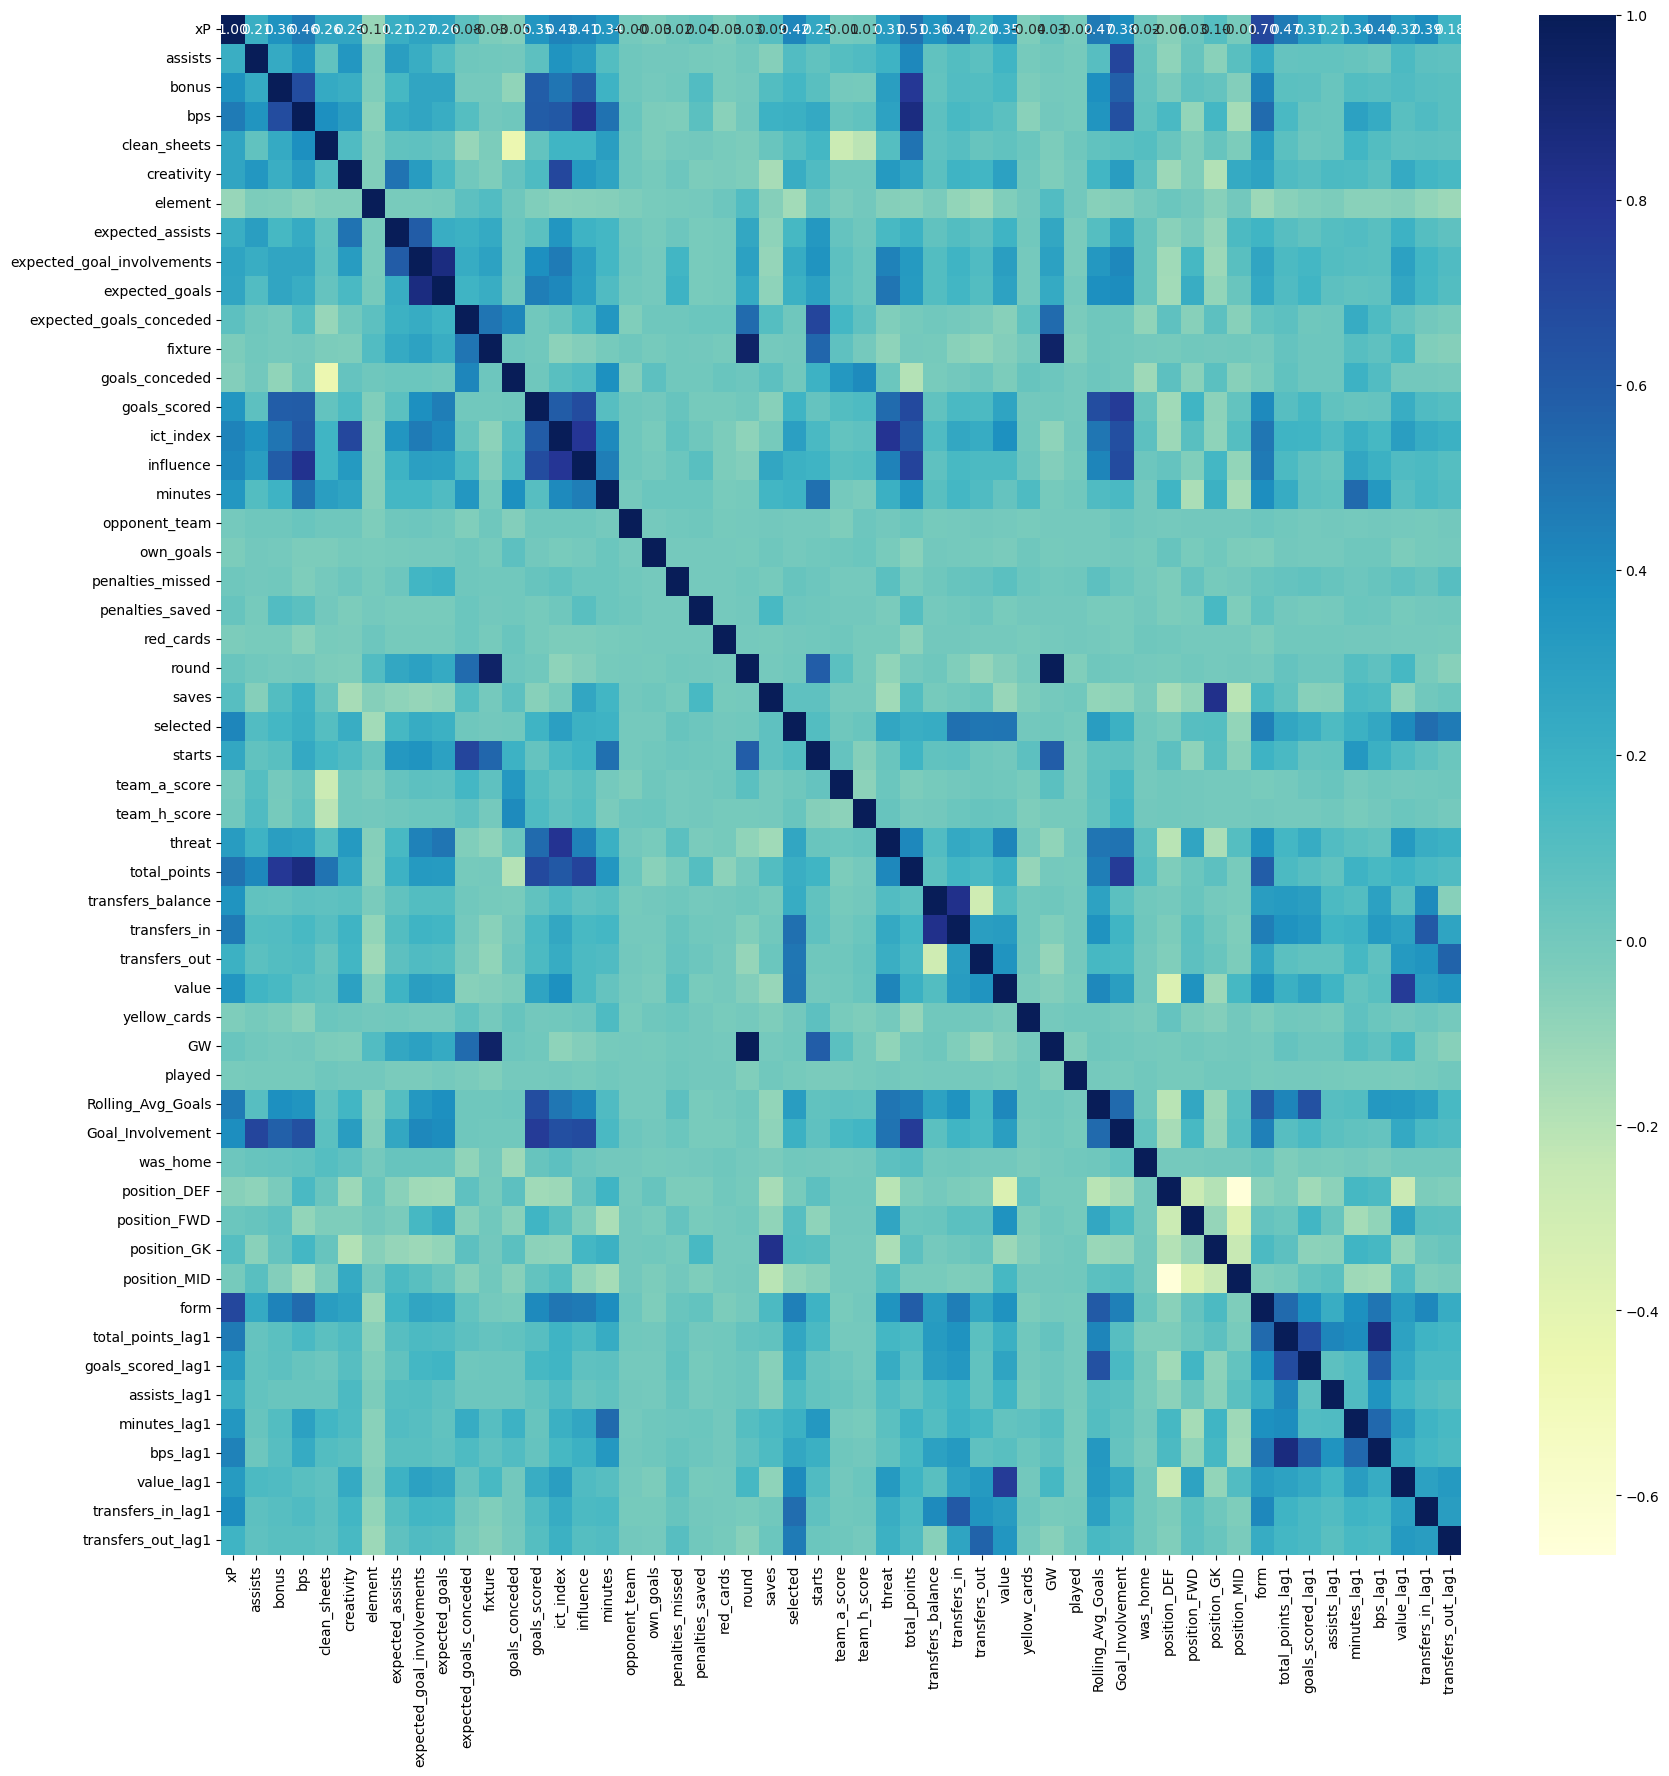

In [7]:
corr = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Create a heatmap with annotations
sns.heatmap(corr, cmap="YlGnBu", annot=True, fmt=".2f")

# Display the plot
plt.show()

We can see high correlations between a couple columns we will look into these correlations in the next stage of our analysis.

/Users/mu-izzgbadamosi/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


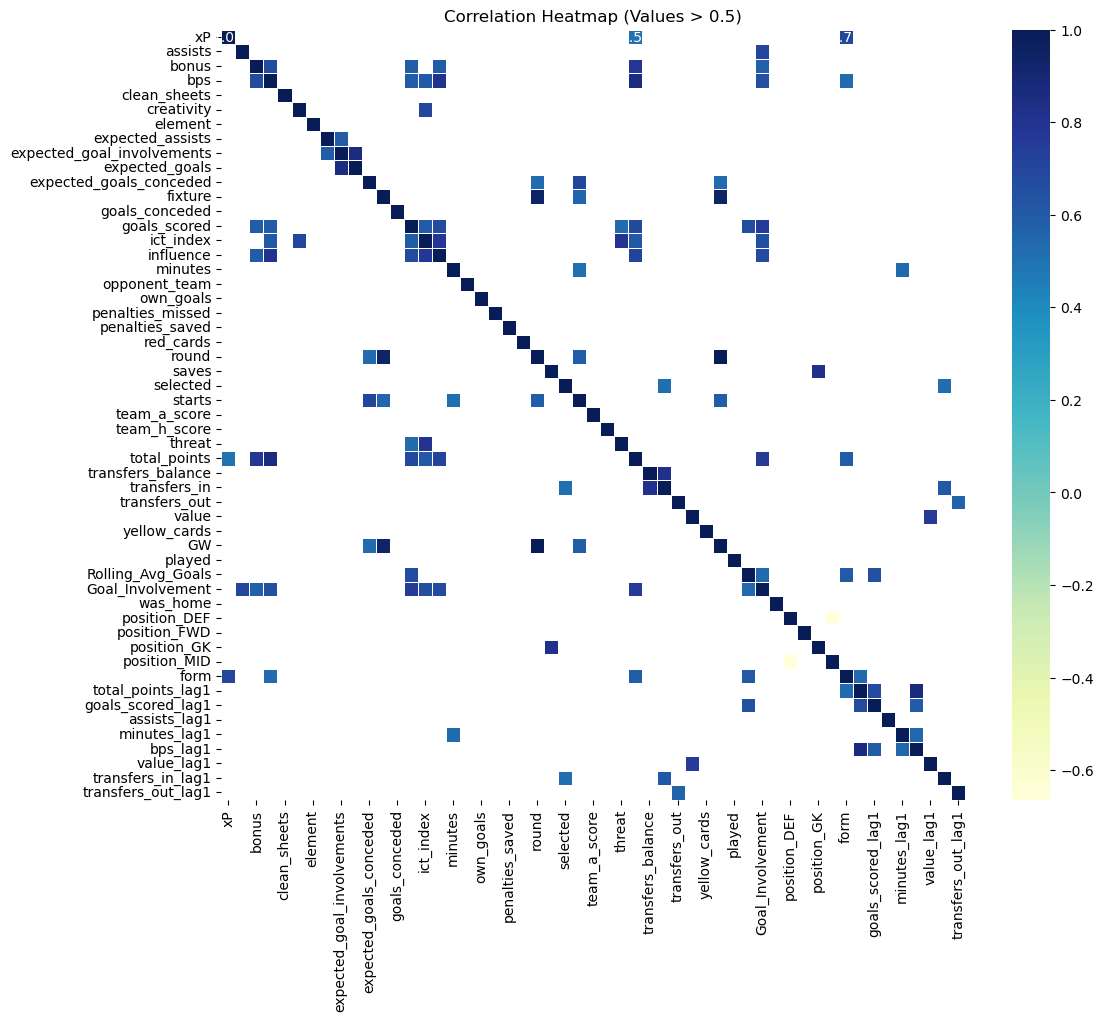

In [8]:
correlation_matrix = numeric_df.corr()

# Filter values greater than 0.5
high_correlation_matrix = correlation_matrix[correlation_matrix.abs() > 0.5]

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(high_correlation_matrix, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap (Values > 0.5)')
plt.show()

We can see that there is a lot of collinearity in our dataset.Let's look at some of our findings
Finding:
- The columns 'GW' and 'fixture' exhibit a strong positive correlation of approximately 0.95.
- The columns 'round' and 'fixture' exhibit a strong positive correlation of approximately 0.95.
- These findings are expected as the fixture, gameweek, and round all give insights on when a certain match is meant to take place

We will look a little further into these correlations later on when we are creating our linear regression model.

Since we are going to split our data set, we can define our X anf y variables. X will be our dataframe containing all our numeric columns which we call our independent variables. y will be a dataframe containing only our target variable `total_points`

In [9]:
# define feature matrix X and target variable y as total_points
X = feature_df.drop(columns=['total_points'])
y = feature_df['total_points']

Let's do a sanity check by making sure we only numeric columns in our dataset by checking using the `.info` function.

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11345 entries, 223 to 10346
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        11345 non-null  object 
 1   team                        11345 non-null  object 
 2   xP                          11345 non-null  float64
 3   assists                     11345 non-null  int64  
 4   bonus                       11345 non-null  int64  
 5   bps                         11345 non-null  int64  
 6   clean_sheets                11345 non-null  int64  
 7   creativity                  11345 non-null  float64
 8   element                     11345 non-null  int64  
 9   expected_assists            11345 non-null  float64
 10  expected_goal_involvements  11345 non-null  float64
 11  expected_goals              11345 non-null  float64
 12  expected_goals_conceded     11345 non-null  float64
 13  fixture                     11345 

In [11]:
X.head()

,name,team,xP,assists,bonus,bps,clean_sheets,creativity,element,expected_assists,...,position_MID,form,total_points_lag1,goals_scored_lag1,assists_lag1,minutes_lag1,bps_lag1,value_lag1,transfers_in_lag1,transfers_out_lag1
223,Aaron Cresswell,West Ham,1.3,0,0,16,0,18.7,457,0.0,...,0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
526,Aaron Cresswell,West Ham,2.0,0,0,14,0,65.8,457,0.0,...,0,1.50,1.0,0.0,0.0,90.0,16.0,50.0,0.0,0.0
819,Aaron Cresswell,West Ham,1.0,0,0,6,0,38.8,457,0.0,...,0,1.00,2.0,0.0,0.0,90.0,14.0,50.0,45044.0,23535.0
1112,Aaron Cresswell,West Ham,2.2,0,0,26,1,5.8,457,0.0,...,0,2.25,0.0,0.0,0.0,90.0,6.0,50.0,20572.0,39986.0
1398,Aaron Cresswell,West Ham,1.7,0,0,16,0,1.5,457,0.0,...,0,2.20,6.0,0.0,0.0,90.0,26.0,50.0,5437.0,58599.0


Let's also take a look at the Variance Inflation Factor(VIF) to see which columns in our dataset have high multicollinearity. 

In [12]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

numeric_columns = X.select_dtypes(include=['float64', 'int64'])

# VIF assumes the presence of a constant in X
X_const = sm.add_constant(numeric_columns)

# Calculate Variance Inflation Factor (VIF) for each feature
vif_values = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Create a Pandas Series with feature names as index and corresponding VIF values
vif_series = pd.Series(vif_values, index=X_const.columns)

# Exclude the constant term from the VIF Series
vif_series_excluding_constant = vif_series[1:]

# Print or return the VIF values
print(vif_series_excluding_constant.sort_values(ascending=False))


/Users/mu-izzgbadamosi/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Users/mu-izzgbadamosi/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


position_FWD                           inf
GW                                     inf
round                                  inf
position_DEF                           inf
position_MID                           inf
goals_scored                           inf
assists                                inf
position_GK                            inf
Goal_Involvement                       inf
transfers_in                  2.535168e+11
transfers_balance             2.514152e+11
transfers_out                 8.902066e+10
ict_index                     4.485157e+03
threat                        1.006372e+03
influence                     8.768532e+02
creativity                    7.171844e+02
expected_goal_involvements    1.205044e+01
fixture                       1.099352e+01
expected_goals                8.759940e+00
bps                           7.146479e+00
bps_lag1                      6.423461e+00
total_points_lag1             6.378159e+00
Rolling_Avg_Goals             5.387547e+00
goals_score

We can see a couple of our columns have high VIF. Any columns with VIF greater than 5 have to be investigatedbefore we can proceed with linear regression. 
- Columns like `transfers_balance`, `ict_index` show very high collinearity.
- Other columns like `position_MID` that show have a VIF of `inf` could mean that the VIF is either extremely low or extremely high. 
We can take a look at the correlation heatmap to serve as a guide when investigating multicollinearity

For now we will go ahead and split our data into train and test sets to begin with our linear regression model.

In [13]:
from sklearn.model_selection import train_test_split


# Split the dataset into training and testing sets

# X_const: Feature matrix with the constant term added
# y: Target variable
# test_size=0.2: 20% of the data will be used for testing
# random_state=42: Setting the random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X_const, y, test_size=0.2, random_state=42)

Let's take a look at the columns that have the highiest correlation with our target variable.

In [14]:
numeric_df.corr()["total_points"].sort_values(ascending=False)

total_points                  1.000000
bps                           0.859378
bonus                         0.776054
Goal_Involvement              0.754519
influence                     0.719406
goals_scored                  0.683225
ict_index                     0.615847
form                          0.588101
xP                            0.505288
clean_sheets                  0.497489
Rolling_Avg_Goals             0.453516
assists                       0.410994
threat                        0.410097
minutes                       0.343446
expected_goal_involvements    0.327985
expected_goals                0.319305
creativity                    0.263161
selected                      0.212744
value                         0.202761
expected_assists              0.190818
minutes_lag1                  0.185759
value_lag1                    0.177525
starts                        0.169785
transfers_in                  0.166877
bps_lag1                      0.144847
transfers_out            

We can see that `bonus`,`Goal_Involvement`,`influence` and `bps` have over 70% correlation with our target variable. This means that these values follow the samew trend as our target variables and could be very good predictors.

Let's also look at the columns with the highiest collinearity exluding our target variable.

In [15]:
target_variable = 'total_points'  # Replace 'target_variable' with the actual name of your target variable

# Exclude the target variable from the correlation matrix
correlation_matrix = numeric_df.drop(columns=[target_variable]).corr()

# Extract pairs of highly correlated columns
highly_correlated_pairs = (correlation_matrix.stack()
                           .reset_index()
                           .sort_values(by=0, ascending=False)
                           .rename(columns={0: 'correlation', 'level_0': 'column_1', 'level_1': 'column_2'})
                           .query('correlation < 1'))

# Display the highly correlated pairs in descending order
print(highly_correlated_pairs.head(40))

                        column_1                    column_2  correlation
1155                       round                     fixture     0.947858
594                      fixture                       round     0.947858
606                      fixture                          GW     0.947858
1779                          GW                     fixture     0.947858
2540                    bps_lag1           total_points_lag1     0.866730
2336           total_points_lag1                    bps_lag1     0.866730
476               expected_goals  expected_goal_involvements     0.858375
425   expected_goal_involvements              expected_goals     0.858375
1589                transfers_in           transfers_balance     0.823705
1538           transfers_balance                transfers_in     0.823705
2155                 position_GK                       saves     0.822569
1237                       saves                 position_GK     0.822569
783                    influence      

Columns like `fixture` and `GW` have very high collinearity so we will have to drop one of them to reduce the dimensionality of our model and also cause unstable coefficeints meaning small changes in the data can lead to significant changes in the coefficients which could make it challenging to interprete our results.

## Modelling
#### Model 1-Linear Regression
Let's begin modelling using Linear Regression.

In [16]:
from sklearn.linear_model import LinearRegression
# Create an Ordinary Least Squares (OLS) linear regression model
# Fit the model using the training data
my_linreg1 = sm.OLS(y_train, X_train).fit()

# Display a summary of the regression results
# The summary includes information such as coefficients, standard errors, p-values, and more
my_linreg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_points   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     2916.
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        18:54:24   Log-Likelihood:                -9758.4
No. Observations:                9076   AIC:                         1.962e+04
Df Residuals:                    9026   BIC:                         1.997e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.4746      0.046     10.388      0.000       0.385       0.564
xP                             0.0436      0.005      8.724      0.000       0.034       0.053
assists                        0.2864      0.023     12.518      0.000       0.242       0.331
bonus                          1.0783      0.017     64.893      0.000       1.046       1.111
bps                            0.0753      0.002     39.574      0.000       0.072       0.079
clean_sheets                   1.5879      0.027     57.902      0.000       1.534       1.642
creativity                     0.0578      0.015      3.745      0.000       0.028       0.088
element                     8.781e-05   3.95e-05      2.224      0.026    1.04e-05       0.000
expected_assists              -0.5225      0.143     -3.647      0.000      -0.803      -0.242
expected_goal_involvements     0.1129      0.113      1.000      0.318      -0.108       0.334
expected_goals                -0.0568      0.116     -0.491      0.624      -0.284       0.170
expected_goals_conceded        0.0121      0.014      0.842      0.400      -0.016       0.040
fixture                        0.0004      0.000      1.780      0.075   -4.03e-05       0.001
goals_conceded                -0.2250      0.011    -20.376      0.000      -0.247      -0.203
goals_scored                   1.6014      0.036     44.088      0.000       1.530       1.673
ict_index                     -0.6422      0.154     -4.170      0.000      -0.944      -0.340
influence                      0.0493      0.015      3.181      0.001       0.019       0.080
minutes                        0.0082      0.000     17.127      0.000       0.007       0.009
opponent_team                 -0.0007      0.001     -0.538      0.590      -0.003       0.002
own_goals                     -1.9798      0.115    -17.144      0.000      -2.206      -1.753
penalties_missed              -0.9068      0.161     -5.633      0.000      -1.222      -0.591
penalties_saved                3.7306      0.203     18.358      0.000       3.332       4.129
red_cards                     -2.1157      0.153    -13.789      0.000      -2.416      -1.815
round                         -0.0031      0.001     -2.594      0.010      -0.005      -0.001
saves                          0.2022      0.017     12.187      0.000       0.170       0.235
selected                   -3.902e-08   1.11e-08     -3.526      0.000   -6.07e-08   -1.73e-08
starts                         0.0294      0.029      1.017      0.309      -0.027       0.086
team_a_score                   0.0012      0.007      0.162      0.871      -0.013       0.016
team_h_score                   0.0032      0.006      0.498      0.618      -0.009       0.016
threat                         0.0692      

For our first model, we can see that the R-squared is 0.941 and our adjusted R-squared is also 0.940. This means that our model is not overfitted since there is no difference between them.
We can also notice that some of our columns have a p-significant p-values. Any column with a p-value greater than 0.5 signifies lack of statistical significance and might need to be removed. For now, we will first drop one column from each set of columns we saw above with high collinearity. 
The columns we will be dropping for now are `'fixture','expected_goal_involvements','transfers_balance','round','position_GK','influence','threat',`
`'Goal_Involvement','creativity','bonus','Rolling_Avg_Goals','total_points_lag1',etc`

#### Model 2

In [17]:
X_train_new = X_train.drop(columns=['fixture','expected_goal_involvements','transfers_balance','round','position_GK','influence','threat','Goal_Involvement','creativity','bonus','Rolling_Avg_Goals','total_points_lag1'])

my_linreg2 = sm.OLS(y_train, X_train_new).fit()
my_linreg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_points   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     2275.
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        18:54:24   Log-Likelihood:                -11658.
No. Observations:                9076   AIC:                         2.340e+04
Df Residuals:                    9035   BIC:                         2.369e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.4198      0.095      4.412      0.000       0.233       0.606
xP                          0.0520      0.006      8.857      0.000       0.040       0.063
assists                     2.1840      0.040     54.508      0.000       2.105       2.262
bps                         0.1065      0.002     53.404      0.000       0.103       0.110
clean_sheets                1.6181      0.033     48.435      0.000       1.553       1.684
element                     0.0002   4.86e-05      3.121      0.002    5.64e-05       0.000
expected_assists           -0.4379      0.113     -3.873      0.000      -0.660      -0.216
expected_goals              0.3814      0.066      5.755      0.000       0.251       0.511
expected_goals_conceded    -0.0260      0.017     -1.485      0.138      -0.060       0.008
goals_conceded             -0.2112      0.014    -15.569      0.000      -0.238      -0.185
goals_scored                3.6105      0.056     64.882      0.000       3.501       3.720
ict_index                  -0.0319      0.005     -6.671      0.000      -0.041      -0.023
minutes                     0.0042      0.001      7.243      0.000       0.003       0.005
opponent_team              -0.0024      0.002     -1.483      0.138      -0.006       0.001
own_goals                  -1.6615      0.142    -11.696      0.000      -1.940      -1.383
penalties_missed           -0.7336      0.197     -3.715      0.000      -1.121      -0.347
penalties_saved             4.9537      0.248     19.951      0.000       4.467       5.440
red_cards                  -1.8171      0.189     -9.635      0.000      -2.187      -1.447
saves                       0.2115      0.019     11.026      0.000       0.174       0.249
selected                -3.515e-08   1.36e-08     -2.582      0.010   -6.18e-08   -8.46e-09
starts                      0.0659      0.036      1.854      0.064      -0.004       0.136
team_a_score               -0.0420      0.009     -4.639      0.000      -0.060      -0.024
team_h_score               -0.0388      0.008     -4.929      0.000      -0.054      -0.023
transfers_in            -4.077e-07    1.3e-07     -3.126      0.002   -6.63e-07   -1.52e-07
transfers_out            3.424e-07   2.03e-07      1.684      0.092   -5.62e-08    7.41e-07
value                      -0.0081      0.001     -6.133      0.000      -0.011      -0.006
yellow_cards               -0.6759      0.030    -22.854      0.000      -0.734      -0.618
GW                         -0.0034      0.001     -2.677      0.007      -0.006      -0.001
played                     -0.0179      0.018     -0.968      0.333      -0.054       0.018
was_home                    0.0244      0.019      1.298      0.194      -0.012       0.061
position_DEF                0.3113      0.068  

Findings:
- After dropping the collinear columns, our R-squared dropped to 0.910. This means there is a 91.0% variance in the data
- R-squared and adjusted R-squared are still almost equal showing no sign of overfitting.
- We still have some variables with p-values greater than 0.05.

Let's drop some of those columns with high p-values and notice any changes.

#### Model 3

In [18]:
X_train_new2 = X_train.drop(columns=['fixture','expected_goal_involvements','transfers_balance','round','position_GK','influence','threat','Goal_Involvement','creativity','bonus','Rolling_Avg_Goals','total_points_lag1','starts','played','was_home','selected','opponent_team','element','expected_goals_conceded','transfers_out','goals_scored_lag1','assists_lag1'])

my_linreg3 = sm.OLS(y_train, X_train_new2).fit()
my_linreg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_points   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     3026.
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        18:54:24   Log-Likelihood:                -11672.
No. Observations:                9076   AIC:                         2.341e+04
Df Residuals:                    9045   BIC:                         2.363e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4487      0.088      5.106      0.000       0.276       0.621
xP                     0.0518      0.006      8.938      0.000       0.040       0.063
assists                2.1858      0.040     54.596      0.000       2.107       2.264
bps                    0.1063      0.002     53.807      0.000       0.102       0.110
clean_sheets           1.6248      0.033     48.786      0.000       1.559       1.690
expected_assists      -0.4180      0.111     -3.769      0.000      -0.635      -0.201
expected_goals         0.3922      0.065      6.000      0.000       0.264       0.520
goals_conceded        -0.2160      0.013    -16.812      0.000      -0.241      -0.191
goals_scored           3.6152      0.055     65.206      0.000       3.507       3.724
ict_index             -0.0323      0.005     -6.810      0.000      -0.042      -0.023
minutes                0.0046      0.001      8.657      0.000       0.004       0.006
own_goals             -1.6692      0.142    -11.747      0.000      -1.948      -1.391
penalties_missed      -0.7426      0.197     -3.762      0.000      -1.129      -0.356
penalties_saved        4.9483      0.248     19.927      0.000       4.462       5.435
red_cards             -1.8080      0.189     -9.590      0.000      -2.178      -1.438
saves                  0.2095      0.019     10.975      0.000       0.172       0.247
team_a_score          -0.0425      0.009     -4.719      0.000      -0.060      -0.025
team_h_score          -0.0393      0.008     -5.031      0.000      -0.055      -0.024
transfers_in       -4.625e-07   1.27e-07     -3.636      0.000   -7.12e-07   -2.13e-07
value                 -0.0085      0.001     -6.723      0.000      -0.011      -0.006
yellow_cards          -0.6776      0.030    -22.916      0.000      -0.736      -0.620
GW                    -0.0028      0.001     -2.836      0.005      -0.005      -0.001
position_DEF           0.3174      0.068      4.701      0.000       0.185       0.450
position_FWD           0.3302      0.074      4.433      0.000       0.184       0.476
position_MID           0.4071      0.069      5.925      0.000       0.272       0.542
form                   0.1709      0.009     18.570      0.000       0.153       0.189
minutes_lag1          -0.0014      0.000     -3.461      0.001      -0.002      -0.001
bps_lag1              -0.0131      0.001    -10.895      0.000      -0.015      -0.011
value_lag1             0.0046      0.001      4.842      0.000       0.003       0.006
transfers_in_lag1  -8.142e-07   1.24e-07     -6.555      0.000   -1.06e-06   -5.71e-07
transfers_out_lag1  6.241e-07   1.79e-07      3.487      0.000    2.73e-07    9.75e-07
==============================================================================
Omnibus:                      659.266   Durbin

Findings:
- After dropping the columns with high p-value, our R-squared dropped to 0.909.
- R-squared and adjusted R-squared are still almost equal showing no sign of overfitting.
- We still have some variables with p-values greater than 0.05.

Before, we drop those columns, let's take a forward/bottom up approach for our modelling. We can begin by adding first adding only the columns that have high correlations with our `target variable`.

#### Model 4

In [19]:
my_linreg4 = sm.OLS(y_train, X_train[['const','bps','influence', 'saves', 'goals_scored','assists']]).fit()
my_linreg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_points   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     8059.
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        18:54:24   Log-Likelihood:                -14881.
No. Observations:                9076   AIC:                         2.977e+04
Df Residuals:                    9070   BIC:                         2.982e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4424      0.022     20.208      0.000       0.399       0.485
bps              0.1906      0.002     86.329      0.000       0.186       0.195
influence       -0.0325      0.002    -18.347      0.000      -0.036      -0.029
saves            0.1586      0.017      9.410      0.000       0.126       0.192
goals_scored     3.3791      0.061     55.727      0.000       3.260       3.498
assists          1.8821      0.049     38.051      0.000       1.785       1.979
==============================================================================
Omnibus:                      493.079   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1426.649
Skew:                           0.263   Prob(JB):                    1.61e-310
Kurtosis:                       4.870   Cond. No.                         125.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Findings:

After adding the variables with high correlation values with our target variable, our R-squared is now 0.816
- R-squared and adjusted R-squared are still almost equal showing no sign of overfitting.
- We still have no variables with p-values greater than 0.05.

The bottom up approach will take longer since we have to add the columns on by one.
Let's carry on futher with `Model 3` and drop a couple more columns. Before we do so, we can take a look at the dataset to see if there are any other columns with high collinearity.

In [20]:
# Exclude the constant column from the correlation matrix
correlation_matrix = X_train_new2.drop(columns=['const']).corr()

# Extract pairs of highly correlated columns
highly_correlated_pairs = (correlation_matrix.stack()
                           .reset_index()
                           .sort_values(by=0, ascending=False)
                           .rename(columns={0: 'correlation', 'level_0': 'column_1', 'level_1': 'column_2'})
                           .query('correlation < 1'))

# Display the top 30 highly correlated pairs in descending order
print(highly_correlated_pairs.head(30))

              column_1           column_2  correlation
828         value_lag1              value     0.761369
567              value         value_lag1     0.761369
24                  xP               form     0.695738
720               form                 xP     0.695738
242          ict_index                bps     0.617451
68                 bps          ict_index     0.617451
857  transfers_in_lag1       transfers_in     0.609375
538       transfers_in  transfers_in_lag1     0.609375
67                 bps       goals_scored     0.597824
212       goals_scored                bps     0.597824
247          ict_index       goals_scored     0.592324
218       goals_scored          ict_index     0.592324
805           bps_lag1       minutes_lag1     0.539738
776       minutes_lag1           bps_lag1     0.539738
84                 bps               form     0.534967
722               form                bps     0.534967
759       minutes_lag1            minutes     0.528753
295       

We can see that the most correlated columns are about 60% collinear. Since the collinearity is not so high, we can leave those columns for now and take a look at the VIF for more insights

In [21]:
# Create an empty DataFrame to store VIF values
vif = pd.DataFrame()

# Add the variable names to the DataFrame
vif["Variable"] = X_train_new2.columns

# Calculate and add the Variance Inflation Factor (VIF) for each variable
# This loop iterates through each variable in X_train_new2 and computes its VIF
vif["VIF"] = [round(variance_inflation_factor(X_train_new2.values, i), 2) for i in range(X_train_new2.shape[1])]

# Print the DataFrame displaying variable names and their corresponding VIF values
print(vif)

              Variable    VIF
0                const  91.13
1                   xP   2.32
2              assists   1.70
3                  bps   5.06
4         clean_sheets   2.10
5     expected_assists   1.43
6       expected_goals   1.61
7       goals_conceded   2.77
8         goals_scored   3.79
9            ict_index   2.92
10             minutes   3.21
11           own_goals   1.02
12    penalties_missed   1.06
13     penalties_saved   1.04
14           red_cards   1.01
15               saves   3.25
16        team_a_score   1.36
17        team_h_score   1.47
18        transfers_in   1.91
19               value   3.55
20        yellow_cards   1.10
21                  GW   1.34
22        position_DEF  12.01
23        position_FWD   7.47
24        position_MID  13.87
25                form   2.93
26        minutes_lag1   2.10
27            bps_lag1   1.90
28          value_lag1   3.27
29   transfers_in_lag1   1.80
30  transfers_out_lag1   1.26


We can see that only `position_DEF`,`position_MID`, and `position_FWD` have VIF greater than 5.
Let's drop one of these columns and columns from Model 2 with p-values greater than 0.05.

#### Model 5

In [22]:
X_train_new3 = X_train_new2.drop(columns=['position_FWD','ict_index','GW'])

my_linreg5 = sm.OLS(y_train, X_train_new3).fit()
my_linreg5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_points   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     3340.
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        18:54:27   Log-Likelihood:                -11702.
No. Observations:                9076   AIC:                         2.346e+04
Df Residuals:                    9048   BIC:                         2.366e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.6882      0.062     11.112      0.000       0.567       0.810
xP                     0.0510      0.006      8.774      0.000       0.040       0.062
assists                2.1485      0.039     54.675      0.000       2.072       2.226
bps                    0.1039      0.002     53.108      0.000       0.100       0.108
clean_sheets           1.6401      0.033     49.186      0.000       1.575       1.705
expected_assists      -0.6253      0.105     -5.955      0.000      -0.831      -0.419
expected_goals         0.3177      0.063      5.065      0.000       0.195       0.441
goals_conceded        -0.2151      0.013    -16.697      0.000      -0.240      -0.190
goals_scored           3.5274      0.053     66.572      0.000       3.423       3.631
minutes                0.0036      0.001      7.070      0.000       0.003       0.005
own_goals             -1.6584      0.143    -11.638      0.000      -1.938      -1.379
penalties_missed      -0.7419      0.198     -3.749      0.000      -1.130      -0.354
penalties_saved        4.8918      0.249     19.651      0.000       4.404       5.380
red_cards             -1.8086      0.189     -9.565      0.000      -2.179      -1.438
saves                  0.1516      0.014     10.859      0.000       0.124       0.179
team_a_score          -0.0429      0.009     -4.764      0.000      -0.061      -0.025
team_h_score          -0.0393      0.008     -5.022      0.000      -0.055      -0.024
transfers_in       -4.776e-07   1.27e-07     -3.752      0.000   -7.27e-07   -2.28e-07
value                 -0.0082      0.001     -6.664      0.000      -0.011      -0.006
yellow_cards          -0.6727      0.030    -22.691      0.000      -0.731      -0.615
position_DEF           0.0589      0.035      1.696      0.090      -0.009       0.127
position_MID           0.1146      0.029      4.017      0.000       0.059       0.171
form                   0.1686      0.009     18.272      0.000       0.150       0.187
minutes_lag1          -0.0015      0.000     -3.685      0.000      -0.002      -0.001
bps_lag1              -0.0131      0.001    -10.915      0.000      -0.015      -0.011
value_lag1             0.0043      0.001      4.683      0.000       0.002       0.006
transfers_in_lag1  -8.393e-07   1.25e-07     -6.738      0.000   -1.08e-06   -5.95e-07
transfers_out_lag1  5.607e-07   1.79e-07      3.141      0.002    2.11e-07    9.11e-07
==============================================================================
Omnibus:                      649.060   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2029.894
Skew:                           0.353   Prob(JB):                         0.00
Kurtosis:                       5.207   Cond. No.                     

Findings:

After dropping the required columns, our R-squared is now 0.909
- R-squared and adjusted R-squared are still almost equal showing no sign of overfitting.
- We have no variables with p-values greater than 0.05.
- We have 27 independent variables which we can use for our prediction

Let's take a look at all our models so far:

**Model Assessment with R<sup>2<sup/>** <br>
    
| Model | Variables                                  | R<sup>2<sup/>    |
|-------|--------------------------------------------|-------|
| 1 | All                                        | 0.941 |
| 2 | All minus Collinear columns                       | 0.910 |
| 3 | All minus Columns with high p-values | 0.909 |
| 4 | Columns with high colinearity with dependent variable                                     | 0.816 |
| 5 | Model 2 minus columns with high colinearity and p-values                                     | 0.909 |
    
We decided to go with `Model 5` because it has a good R-squared value of 0.878 and has a decent amount of independent variables(21) that have colinearity of less than 50%.
    
Let's take a look at the VIF of our new dataframe to confirm that there are variables with multicollinearity.

In [23]:
vif = pd.DataFrame()
vif["Variable"] = X_train_new3.columns
vif["VIF"] = [round(variance_inflation_factor(X_train_new3.values, i),2) for i in range(X_train_new3.shape[1])]
print(vif)

              Variable    VIF
0                const  44.98
1                   xP   2.32
2              assists   1.63
3                  bps   4.93
4         clean_sheets   2.09
5     expected_assists   1.27
6       expected_goals   1.48
7       goals_conceded   2.77
8         goals_scored   3.44
9              minutes   3.01
10           own_goals   1.02
11    penalties_missed   1.06
12     penalties_saved   1.04
13           red_cards   1.01
14               saves   1.72
15        team_a_score   1.35
16        team_h_score   1.47
17        transfers_in   1.90
18               value   3.29
19        yellow_cards   1.10
20        position_DEF   3.15
21        position_MID   2.38
22                form   2.92
23        minutes_lag1   2.09
24            bps_lag1   1.90
25          value_lag1   3.04
26   transfers_in_lag1   1.80
27  transfers_out_lag1   1.25


We can see that none of the columns have a VIF greater than 5 except for our `const` which we can ignore.

Verifying assumptions associated with linear regression models

There are four assumptions associated with a linear regression model:

1. **Linearity**: The relationship between the predictor and target variables to be linear.
2. **Independence/No Multicollinearity**: The predictor variables are independent of each other.
3. **Residuals** are normally distributed.**
4. **Homoscedasticity**: The variance of residual is the same for any value of X.**

So far we have satisfied the first assumptions associated with a linear regression model. We still need to check the remaining two(residuals and homoscedasticity).

To do so, we will begin by plotting the distribution of our residual values and confirm it is normally distributed.

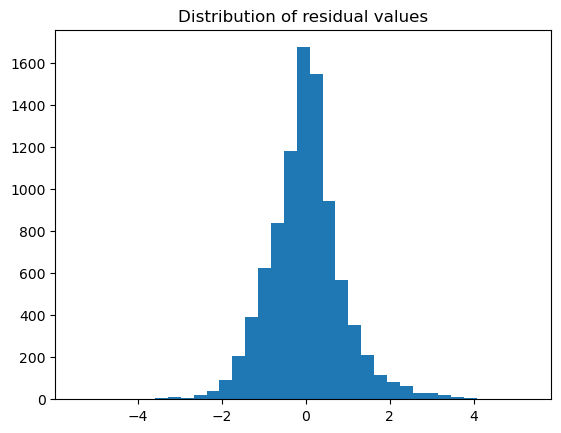

In [24]:
# Plotting the residuals of the model 3.1.2
plt.figure()
plt.hist(my_linreg5.resid, bins = 35)
plt.title('Distribution of residual values')
plt.show()

The residuals appears to be nearly normal distributed. Let's take a look at the p-value to gain moe insights

In [25]:
from scipy import stats

print("Shapiro-Wilk Test: ", stats.shapiro(my_linreg5.resid))

Shapiro-Wilk Test:  ShapiroResult(statistic=0.9740979075431824, pvalue=1.536461548480346e-37)


/Users/mu-izzgbadamosi/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The p-value of the Shapiro-Wilk test is almost zero and less than 0.05.This iondicates that the residuals do not follow a normal distribution. 

Let's look at the Q-Q plot

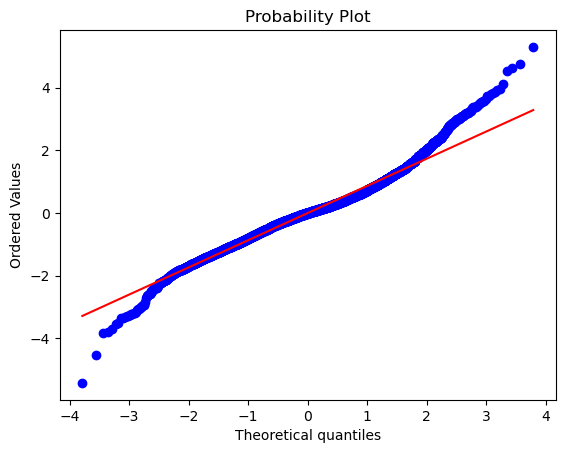

In [26]:
from scipy import stats

plt.figure()
stats.probplot(my_linreg5.resid, dist="norm", plot=plt)
plt.show()

The dots on the plot some outliers while the overall curved shape and the dots on both sides of the diagonal signals a slight right-skew which we already saw in the histogram.

Let's look at the Residuals vs Fitted Values lastly.

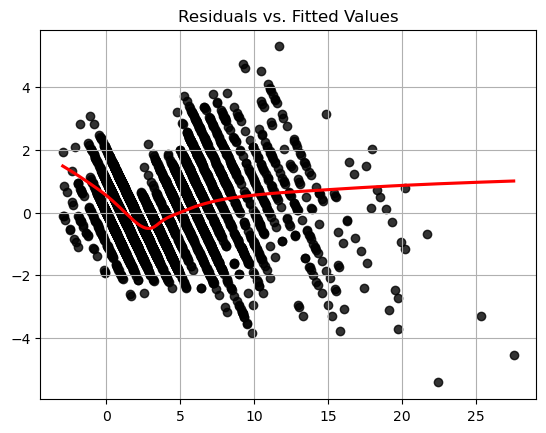

In [27]:
#Residuals vs. Fitted Values
sns.regplot(x = my_linreg5.fittedvalues, y = my_linreg5.resid, lowess = True, 
                       scatter_kws = {"color": "black"}, line_kws = {"color": "red"})
plt.title('Residuals vs. Fitted Values')
plt.grid()

From the scatter plot of Residuals vs. Fitted Values, heteroscedasticity seems to be present in the data.

Based on our analysis it seems that our regression assumptions are not fully met which means that our t-test results are not very reliable for selection of our predictors.

Based on our model, let's see which of our variables are most significant to our model.

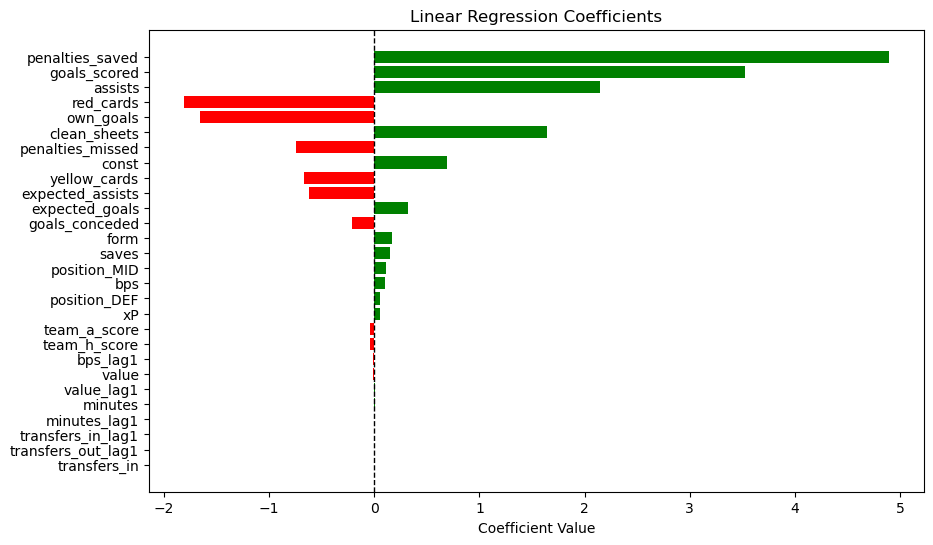

In [28]:
# Get the coefficients and corresponding feature names
coefficients = my_linreg5.params
feature_names = X_train_new3.columns

coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient values for better visualization
coefficients_df['Abs_Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=True)

# Plot the coefficients with positive in green and negative in red
colors = ['green' if coef > 0 else 'red' for coef in coefficients_df['Coefficient']]

# Center the 0 axis
plt.figure(figsize=(10, 6))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'], color=colors)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)  # Center line at 0
plt.xlabel('Coefficient Value')
plt.title('Linear Regression Coefficients')
plt.show()

Based on the plot the variables with the strongest influence(highiest coefficient) on our target variable are `penalties_saved`, `goals_score`, and `assists`. This makes sense since `penalties_saved` gave one of the most points.

Let's create our test set based on our new train set we selected for our model

In [29]:
X_test_new2=X_test.drop(columns=['fixture','expected_goal_involvements','transfers_balance','round','position_GK','influence','threat','Goal_Involvement','creativity','bonus','Rolling_Avg_Goals','total_points_lag1','starts','played','was_home','selected','opponent_team','element','expected_goals_conceded','transfers_out','goals_scored_lag1','assists_lag1'])
X_test_new3=X_test_new2.drop(columns=['position_FWD','ict_index','GW'])

Let's store our prediction values for both our test anr trains sets in different variables

In [30]:
pred_test_lr = my_linreg5.predict(X_test_new3)
pred_train_lr = my_linreg5.predict(X_train_new3)

Let's also go ahead and calculate the mean absolute error(MAE) for our model. Lower values of MAE indicate better model performance, as it signifies that the model's predictions are, on average, closer to the true values. 
We will also use the MAE to verify the fit of our model later on.

In [31]:
from sklearn.metrics import mean_absolute_error

mae_test = mean_absolute_error(y_test, pred_test_lr)
mae_train=mean_absolute_error(y_train, pred_train_lr)

We can store the R-squared, Adjusted R-squared, MAE for our test and train sets in a dataframe to compare our models as we go and see their performance

In [32]:
# create a dataframe to compare different models
model_comp = pd.DataFrame({ 'Target variable' : 'Total Points',
                           'MAE on train':   mae_train,
                           'MAE on test':    mae_test,
                           'R-squared' :      my_linreg5.rsquared,
                           'Adjusted R-squared' :my_linreg5.rsquared_adj,
                          }, index = ['Linear Regression'])
model_comp

,Target variable,MAE on train,MAE on test,R-squared,Adjusted R-squared
Linear Regression,Total Points,0.642448,0.652247,0.908808,0.908536


Findings:
- As indicated by the high R-squared and adjusted R-squared values,our model seems to capture a substantial portion(`90.9%`) of the variability in `total_points`.
- MAE values on both the training and test sets are relatively low, indicating good predictive performance with small errors.

Now that we have created our Linear Regression model, let's try to add a dimensioon reducer like Principal Component Analysis(PCA) to see if it improves our model. 

We will first of set up a pipeline to preprocess the data (scaling and dimensionality reduction) which we will apply to our linear regression model. It fits the pipeline to the training data and uses it to predict the target variable for both the training and test sets. The goal is to create a model that can make accurate predictions on new, unseen data. 

Let's set the number of components `n_components` of our PCA  to 0.9 which means that we will retain enough principal components to explain 90% of the variance in the original data. 

### Model 2-Linear Regression with PCA

In [33]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Define the pipeline with Standard Scaler, PCA, and Linear Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.9)),  # Adjust the number of components as needed
    ('regressor', LinearRegression())
])

# Fit the pipeline on the training data
pipeline.fit(X_train_new3, y_train)

# Predictions on train and test sets
y_train_pred = pipeline.predict(X_train_new3)
y_test_pred = pipeline.predict(X_test_new3)

# Calculate R-squared for train and test sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate adjusted R-squared for train and test sets
n_train, p_train = X_train_new3.shape
n_test, p_test = X_test_new3.shape
adj_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - p_train - 1))
adj_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - p_test - 1))

# Print R-squared and adjusted R-squared values
print(f'R-squared (Train): {r2_train:.4f}')
print(f'R-squared (Test): {r2_test:.4f}')
print(f'Adjusted R-squared (Train): {adj_r2_train:.4f}')
print(f'Adjusted R-squared (Test): {adj_r2_test:.4f}')

R-squared (Train): 0.8926
R-squared (Test): 0.8914
Adjusted R-squared (Train): 0.8923
Adjusted R-squared (Test): 0.8900


Let's fit our new model and give it a name

In [34]:
linreg_pca_model = pipeline.fit(X_train_new3, y_train)

Let's store our prediction values for both our test and trains sets in different variables

In [35]:
pred_test_linpca = linreg_pca_model.predict(X_test_new3)
pred_train_linpca = linreg_pca_model.predict(X_train_new3)

In [36]:
from sklearn.metrics import mean_absolute_error

mae_test_linpca = mean_absolute_error(y_test, pred_test_linpca)
mae_train_linpca=mean_absolute_error(y_train, pred_train_linpca)

In [37]:
model_comp = pd.concat([model_comp,pd.DataFrame({'Target variable': 'Total Points',
                                            'MAE on train': mae_train_linpca,
                                             'MAE on test': mae_test_linpca,
                                             'R-squared': r2_train,
                                             'Adjusted R-squared': adj_r2_train},
                                            index=['Linear Regression with PCA'])],
                               ignore_index=False)
model_comp

,Target variable,MAE on train,MAE on test,R-squared,Adjusted R-squared
Linear Regression,Total Points,0.642448,0.652247,0.908808,0.908536
Linear Regression with PCA,Total Points,0.702920,0.706291,0.892644,0.892312


Findings:
- As indicated by the high R-squared and adjusted R-squared values,our model seems to capture a substantial portion(`89%`) of the variability in `total_points`.
- MAE values on both the training and test sets are relatively low, indicating good predictive performance with small errors.

Our new model does not perform as well as our initial linear regression model. This is probably because we are just using 90% variance in our data. The good thing about the model is that it can make accurate predictions of new, unseen data and it is not that far off from the initial linear model. 

### Model 3-Decision Tree with PCA
Let's also look at how a decision tree model will perform on our dataset. 

We will set up a pipeline for a decision tree model with three steps: scaling the data, applying PCA for dimensionality reduction, and using a decision tree regressor. We will aslo use and optimize certain hyper parameters to improve the result of our model. These hyperparameters will best optimized using `GridSearchCV` which will systematically ests different combinations of hyperparameters to find the combination that results in the best model performance.

The `cv=5` parameter indicates 5-fold cross-validation, which helps assess the model's performance more reliably.

The parameters we chose were:
- `min_samples_split` to help create a simpler.
- `min_samples_leaf` to get more generalized tree.
- `min_weight_fraction_leaf`as a regularization factor based on sample weights.

All these are parameters with a sole purpose of preventing overfitting

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Create the Decision Tree pipeline with Standard Scaler, PCA, and Decision Tree Regressor
pipeline2 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.9)),
    ('regressor', DecisionTreeRegressor())
])

# Define the hyperparameter grid for GridSearchCV
param_grid2 = {
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__min_weight_fraction_leaf' : [0.01, 0.02, 0.03, 0.04]
}

# Use GridSearchCV to find the best parameters
grid_search_tree = GridSearchCV(pipeline2, param_grid2, cv=5)
grid_search_tree.fit(X_train_new3, y_train)

# Get the best model from GridSearchCV
best_model_tree = grid_search_tree.best_estimator_

# Predictions on train and test sets
y_train_pred_tree = best_model_tree.predict(X_train_new3)
y_test_pred_tree = best_model_tree.predict(X_test_new3)

# Calculate Mean Absolute Error for train and test sets
mae_train_tree = mean_absolute_error(y_train, y_train_pred_tree)
mae_test_tree = mean_absolute_error(y_test, y_test_pred_tree)

# Calculate R-squared for train and test sets
r2_train_tree = r2_score(y_train, y_train_pred_tree)
r2_test_tree = r2_score(y_test, y_test_pred_tree)

# Calculate adjusted R-squared for train and test sets
n_train, p_train = X_train_new3.shape
n_test, p_test = X_test_new3.shape
adj_r2_train_tree = 1 - ((1 - r2_train_tree) * (n_train - 1) / (n_train - p_train - 1))
adj_r2_test_tree = 1 - ((1 - r2_test_tree) * (n_test - 1) / (n_test - p_test - 1))

# Print results
print('Best Hyperparameters:', grid_search_tree.best_params_)
print(f'Mean Absolute Error (Train): {mae_train_tree:.4f}')
print(f'Mean Absolute Error (Test): {mae_test_tree:.4f}')
print(f'R-squared (Train): {r2_train_tree:.4f}')
print(f'R-squared (Test): {r2_test_tree:.4f}')
print(f'Adjusted R-squared (Train): {adj_r2_train_tree:.4f}')
print(f'Adjusted R-squared (Test): {adj_r2_test_tree:.4f}')

Best Hyperparameters: {'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 5, 'regressor__min_weight_fraction_leaf': 0.01}
Mean Absolute Error (Train): 0.6165
Mean Absolute Error (Test): 0.6337
R-squared (Train): 0.8478
R-squared (Test): 0.8365
Adjusted R-squared (Train): 0.8473
Adjusted R-squared (Test): 0.8345


In [54]:
reg_tree = DecisionTreeRegressor(min_samples_leaf = 1, min_samples_split= 5,min_weight_fraction_leaf= 0.01)
model_tree = reg_tree.fit(X_train_new3, y_train)

Let's also take a look a the most significant features for this Decision Tree Model

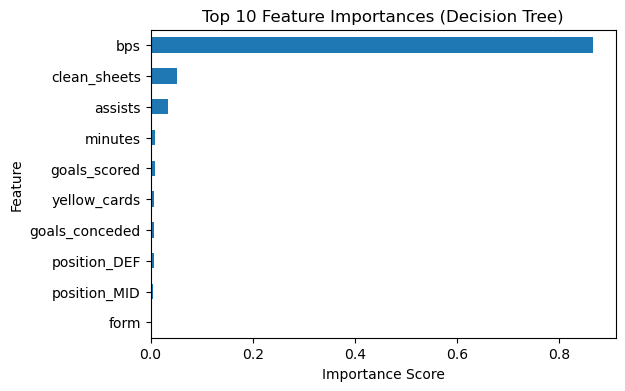

In [55]:
# Get feature importances in decision tree model
feature_importances = model_tree.feature_importances_

# Create a pandas Series for easy sorting
importances_series = pd.Series(feature_importances, index=X_train_new3.columns)

# Sort feature importances in descending order
sorted_importances = importances_series.sort_values(ascending=False)

# Select top 10 feature importances
top_10_importances = sorted_importances.head(10)

# Create a horizontal bar plot for feature importances with largest bar at top
plt.figure(figsize=(6, 4))
top_10_importances.plot(kind='barh')
plt.title("Top 10 Feature Importances (Decision Tree)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # Invert the y-axis to put the largest bar at the top
plt.show()

For our model the features with the most importance are `bps`, `clean_sheets` and `assists`. This is different from the results gotten from our linear regression model.

We can see that `bps` has a significantly highier importance compared to any other feature.It is about 80% more important than `clean_sheets` which is the secomd most important feature 

In [41]:
model_comp = pd.concat([model_comp,pd.DataFrame({'Target variable': 'Total Points',
                                            'MAE on train': mae_train_tree,
                                             'MAE on test': mae_test_tree,
                                             'R-squared': r2_train_tree,
                                             'Adjusted R-squared': adj_r2_train_tree},
                                            index=['Decision Tree with PCA'])],
                               ignore_index=False)
model_comp

,Target variable,MAE on train,MAE on test,R-squared,Adjusted R-squared
Linear Regression,Total Points,0.642448,0.652247,0.908808,0.908536
Linear Regression with PCA,Total Points,0.702920,0.706291,0.892644,0.892312
Decision Tree with PCA,Total Points,0.616513,0.633652,0.847763,0.847292


Findings:
- As indicated by the high R-squared and adjusted R-squared values,our model seems to capture a substantial portion(`84.7%`) of the variability in `total_points`.
- MAE values on both the training and test sets are relatively low, indicating good predictive performance with small errors.
- MAE values of our test and train sets are significantly different which could indicate overfitting of the model

Our Decision Tree Model does not perform as well as our linear regression models. This is probably because we are not using the best hyperparameters possible. We can either spend more time selecting hyperparameters or justy move on to another model since this model does not even perform better than the linear regression models.

### Model 4-Neural Network
Let's proceed to creating a Neural Network model.

To setup this model we will be using the Keras library. The model consists of three layers: a dense layer with 64 units and ReLU activation, a dropout layer to prevent overfitting, another dense layer with 32 units, ReLU activation, and L2 regularization, and a final dense layer with 1 unit (output layer). We will also compile the model using the optimizer (Adam) and the loss function (mean squared error) to minimize loss. We set the number of training epochs to 100 which is the number of times the entire dataset is passed forward and backward through the neural network and set our batch size to 32.
We also included batch normalization which helps to stabilize and speed up training by normalizing the input of each layer.

In [42]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.layers import BatchNormalization

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_new3)
X_test_scaled = scaler.fit_transform(X_test_new3)

# Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_new3.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.3))  # Add dropout with a specified rate
model.add(Dense(32, activation='relu',kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))  # Add dropout with a specified rate
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
nn_model=model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=2)

# Predictions on train and test sets
y_train_pred_nn = model.predict(X_train_scaled).flatten()
y_test_pred_nn = model.predict(X_test_scaled).flatten()

# Calculate Mean Absolute Error for train and validation sets
mae_train_nn = mean_absolute_error(y_train, y_train_pred_nn)
mae_test_nn = mean_absolute_error(y_test, y_test_pred_nn)

# Calculate R-squared for train and validation sets
r2_train_nn = r2_score(y_train, y_train_pred_nn)
r2_test_nn = r2_score(y_test, y_test_pred_nn)

# Calculate adjusted R-squared for train and validation sets
n_train, p_train = X_train.shape
n_val, p_val = X_test.shape
adj_r2_train_nn = 1 - ((1 - r2_train_nn) * (n_train - 1) / (n_train - p_train - 1))
adj_r2_test_nn = 1 - ((1 - r2_test_nn) * (n_val - 1) / (n_val - p_val - 1))

# Print results
print(f'Mean Absolute Error (Train): {mae_train_nn:.4f}')
print(f'Mean Absolute Error (Validation): {mae_test_nn:.4f}')
print(f'R-squared (Train): {r2_train_nn:.4f}')
print(f'R-squared (Validation): {r2_test_nn:.4f}')
print(f'Adjusted R-squared (Train): {adj_r2_train_nn:.4f}')
print(f'Adjusted R-squared (Validation): {adj_r2_test_nn:.4f}')

Epoch 1/100
284/284 - 1s - loss: 8.1676 - val_loss: 2.4594 - 716ms/epoch - 3ms/step
Epoch 2/100
284/284 - 0s - loss: 3.0218 - val_loss: 1.1111 - 219ms/epoch - 770us/step
Epoch 3/100
284/284 - 0s - loss: 2.3982 - val_loss: 0.9291 - 207ms/epoch - 729us/step
Epoch 4/100
284/284 - 0s - loss: 2.1097 - val_loss: 0.8807 - 220ms/epoch - 773us/step
Epoch 5/100
284/284 - 0s - loss: 1.9022 - val_loss: 0.8071 - 233ms/epoch - 821us/step
Epoch 6/100
284/284 - 0s - loss: 1.8355 - val_loss: 0.7469 - 245ms/epoch - 861us/step
Epoch 7/100
284/284 - 0s - loss: 1.7013 - val_loss: 0.7106 - 295ms/epoch - 1ms/step
Epoch 8/100
284/284 - 0s - loss: 1.6283 - val_loss: 0.6166 - 218ms/epoch - 768us/step
Epoch 9/100
284/284 - 0s - loss: 1.5614 - val_loss: 0.6097 - 232ms/epoch - 817us/step
Epoch 10/100
284/284 - 0s - loss: 1.4649 - val_loss: 0.5398 - 226ms/epoch - 797us/step
Epoch 11/100
284/284 - 0s - loss: 1.4734 - val_loss: 0.5550 - 229ms/epoch - 805us/step
Epoch 12/100
284/284 - 0s - loss: 1.4221 - val_loss: 0.6

Let's also take a look at the features with the most significance for our neural network model. We can do this by analyzing the weights of the connections between the input layer and the first hidden layer. The higher the magnitude of a weight, the more significant the corresponding feature.

Top 1 Feature 8: Importance Score = 24.89154624938965
Top 2 Feature 9: Importance Score = 18.425216674804688
Top 3 Feature 4: Importance Score = 18.330345153808594
Top 4 Feature 20: Importance Score = 17.837139129638672
Top 5 Feature 3: Importance Score = 16.504348754882812
Top 6 Feature 2: Importance Score = 16.11600112915039
Top 7 Feature 7: Importance Score = 15.867502212524414
Top 8 Feature 21: Importance Score = 14.656286239624023
Top 9 Feature 14: Importance Score = 13.017409324645996
Top 10 Feature 13: Importance Score = 10.826579093933105


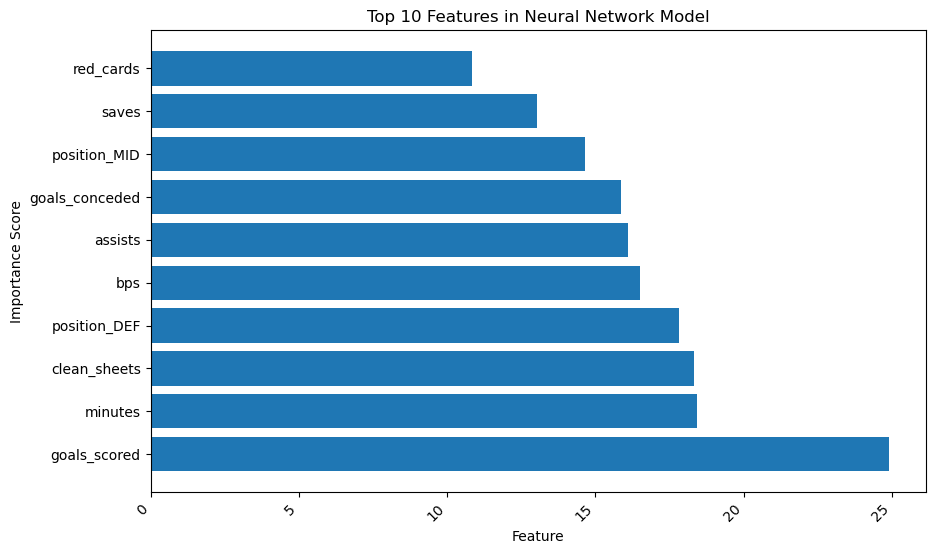

In [43]:
# Extract the weights from the first layer
weights_layer1 = model.layers[0].get_weights()[0]

# Calculate the absolute values of the weights
abs_weights_layer1 = np.abs(weights_layer1)

# Calculate the sum of weights for each feature
sum_weights = np.sum(abs_weights_layer1, axis=1)

# Sort features by their importance (sum of weights)
sorted_features = np.argsort(sum_weights)[::-1]

# Display the top 10 most important features
top_features = sorted_features[:10]

# Print the indices and importance scores of the top 10 features
for i, feature_index in enumerate(top_features):
    print(f"Top {i+1} Feature {feature_index}: Importance Score = {sum_weights[feature_index]}")

# Visualize the importance scores for the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(range(10), sum_weights[top_features], tick_label=X_train_new3.columns[top_features])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Top 10 Features in Neural Network Model')
plt.show()

Interpretation of feature importance in neural networks can be challenging due to the cost and visualization may not give accurate results when compared to simpler models like linear regression and decision tree.

Based on our results, the most significant features for predicting our target variable in our neural network are `goals_scored` followed by `minutes` and `clean_sheets`. 


In [44]:
model_comp = pd.concat([model_comp,pd.DataFrame({'Target variable': 'Total Points',
                                            'MAE on train': mae_train_nn,
                                             'MAE on test': mae_test_nn,
                                             'R-squared': r2_train_nn,
                                             'Adjusted R-squared': adj_r2_train_nn},
                                            index=['Neural Network'])],
                               ignore_index=False)
model_comp

,Target variable,MAE on train,MAE on test,R-squared,Adjusted R-squared
Linear Regression,Total Points,0.642448,0.652247,0.908808,0.908536
Linear Regression with PCA,Total Points,0.702920,0.706291,0.892644,0.892312
Decision Tree with PCA,Total Points,0.616513,0.633652,0.847763,0.847292
Neural Network,Total Points,0.256083,0.267234,0.977720,0.977589


Findings:
- As indicated by the high R-squared and adjusted R-squared values,our model seems to capture a substantial portion(`97.8%`) of the variability in `total_points`.
- MAE values on both the training and test sets are relatively low, indicating good predictive performance with small errors.
- MAE values of our test and train sets are not significantly different which could indicate lack of overfitting

Our Neural Network Model performs the best out of all our models. With this we will have to take some things into consideration like how expensive it is to run a neural network and may require acces to cloud services.

### Model 5-Gradient Boosting with PCA

We will set up a pipeline for a gradient boosting model with three steps: scaling the data, applying PCA for dimensionality reduction, and using a gradient boost regressor. We will aslo use and optimize certain hyper parameters to improve the result of our model. These hyperparameters will best optimized using `GridSearchCV` which will systematically sets different combinations of hyperparameters to find the combination that results in the best model performance.

The `cv=5` parameter indicates 5-fold cross-validation, which helps assess the model's performance more reliably.

The parameters we chose were:
- `learning_rate` to shrink the contribution of each tree. This helps to regularize our model
- `subsample` to use a fraction of samples for each tree.
- `min_samples_leaf` to get more generalized tree.
- `max_depth`to make each tree less complex.

All these are parameters with a sole purpose of preventing overfitting

In [45]:
from sklearn.ensemble import GradientBoostingRegressor


pipeline3 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.9)),
    ('gb', GradientBoostingRegressor(learning_rate=0.1, subsample=0.8))
])

# Define hyperparameters to search
param_grid3 = {
    'gb__max_depth': [3, 5],
    'gb__min_samples_leaf': [1, 2, 3]
}

# Initialize GridSearchCV
grid_search_gb = GridSearchCV(pipeline3, param_grid3, cv=5)

# Fit the model with training data
grid_search_gb.fit(X_train_new3, y_train)

# Get the best model from GridSearchCV
best_model_gb = grid_search_gb.best_estimator_

# Predictions on train and test sets
y_train_pred_gb = best_model_gb.predict(X_train_new3)
y_test_pred_gb = best_model_gb.predict(X_test_new3)

# Calculate Mean Absolute Error for train and test sets
mae_train_gb = mean_absolute_error(y_train, y_train_pred_gb)
mae_test_gb = mean_absolute_error(y_test, y_test_pred_gb)

# Calculate R-squared for train and test sets
r2_train_gb = r2_score(y_train, y_train_pred_gb)
r2_test_gb = r2_score(y_test, y_test_pred_gb)

# Calculate adjusted R-squared for train and test sets
n_train, p_train = X_train_new3.shape
n_test, p_test = X_test_new3.shape
adj_r2_train_gb = 1 - ((1 - r2_train_gb) * (n_train - 1) / (n_train - p_train - 1))
adj_r2_test_gb = 1 - ((1 - r2_test_gb) * (n_test - 1) / (n_test - p_test - 1))

# Print results
print('Best Hyperparameters:', grid_search_gb.best_params_)
print(f'Mean Absolute Error (Train): {mae_train_gb:.4f}')
print(f'Mean Absolute Error (Test): {mae_test_gb:.4f}')
print(f'R-squared (Train): {r2_train_gb:.4f}')
print(f'R-squared (Test): {r2_test_gb:.4f}')
print(f'Adjusted R-squared (Train): {adj_r2_train_gb:.4f}')
print(f'Adjusted R-squared (Test): {adj_r2_test_gb:.4f}')

Best Hyperparameters: {'gb__max_depth': 5, 'gb__min_samples_leaf': 3}
Mean Absolute Error (Train): 0.2871
Mean Absolute Error (Test): 0.4008
R-squared (Train): 0.9789
R-squared (Test): 0.9456
Adjusted R-squared (Train): 0.9788
Adjusted R-squared (Test): 0.9449


After tuning the parameters a couple times we got the results above. We set the parameters as follows:
- `learning_rate`=0.1 
- `subsample`=0.8
- `min_samples_leaf`= 5
- `max_depth`= 3

These gave the best results we could come up with. In the fuuture, we can tune each parameter individually to get the most optimal model.

Let's go ahead and save our model with the new parameters.

In [56]:
reg_gb = GradientBoostingRegressor(learning_rate=0.1, subsample=0.8,min_samples_leaf = 3, max_depth= 5)
model_gb = reg_gb.fit(X_train_new3, y_train)

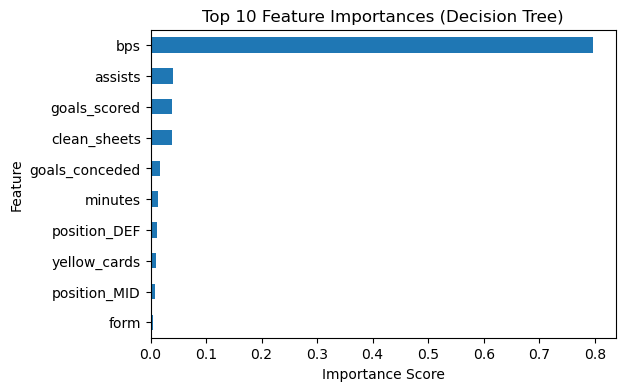

In [57]:
# Get feature importances in decision tree model
feature_importances = model_gb.feature_importances_

# Create a pandas Series for easy sorting
importances_series = pd.Series(feature_importances, index=X_train_new3.columns)

# Sort feature importances in descending order
sorted_importances = importances_series.sort_values(ascending=False)

# Select top 10 feature importances
top_10_importances = sorted_importances.head(10)

# Create a horizontal bar plot for feature importances with largest bar at top
plt.figure(figsize=(6, 4))
top_10_importances.plot(kind='barh')
plt.title("Top 10 Feature Importances (Decision Tree)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # Invert the y-axis to put the largest bar at the top
plt.show()

We can see our most important features are `bps` followed by `assists` and `goals_scored`. Just like we saw in the decision tree, the `bps` seems to be significantly more important to other features to a high degree

## Model Optimization
The Gradient Boost model seems to have a high accuracy but shows signs of overfitting. To fix this, we iterated the process by changing and adjusting the hyperparameters to see if there would be any improvement. After several tries, the model seemed to show no sign of improvement and the signs of overfitting remained intact. 

Since our Neural network showed an accuracy of 98% which is not to far off from the Gradient Boost model, we decided to carry on with it as our optimal model leaving the Gradient Boost the way it is. In the future, a bit more research will be done to see if it is possible to address the matter of overfitting in the model.

## Conclusion
To begin gathering insights from our findings of our models, let's begin by looking at how well our test set fits with our predicted test set. To do this, we can create a scatter plot and a line of best fit so see how we our model fits the test set.

In [48]:
model_comp = pd.concat([model_comp,pd.DataFrame({'Target variable': 'Total Points',
                                            'MAE on train': mae_train_gb,
                                             'MAE on test': mae_test_gb,
                                             'R-squared': r2_train_gb,
                                             'Adjusted R-squared': adj_r2_train_gb},
                                            index=['Gradient Boosting with PCA'])],
                               ignore_index=False)
model_comp

,Target variable,MAE on train,MAE on test,R-squared,Adjusted R-squared
Linear Regression,Total Points,0.642448,0.652247,0.908808,0.908536
Linear Regression with PCA,Total Points,0.702920,0.706291,0.892644,0.892312
Decision Tree with PCA,Total Points,0.616513,0.633652,0.847763,0.847292
Neural Network,Total Points,0.256083,0.267234,0.977720,0.977589
Gradient Boosting with PCA,Total Points,0.287150,0.400785,0.978870,0.978805


Findings:
- As indicated by the high R-squared and adjusted R-squared values,our model seems to capture a substantial portion(`98%`) of the variability in `total_points`.
- PMAE values on both the training and test sets are relatively low, indicating good predictive performance with small errors.
- PMAE values of our test and train sets are significantly different which could indicate overfitting of the model

Our Gradient Boost does not perform as well as our Neural Network model but it performs better than the others. This model is probably not very suitable for our dataset or some more hyperparameter tuning needs to be done.

Now that we have tried out a good amount of models, let's go ahead and get more insights to help with our optimal model selection.

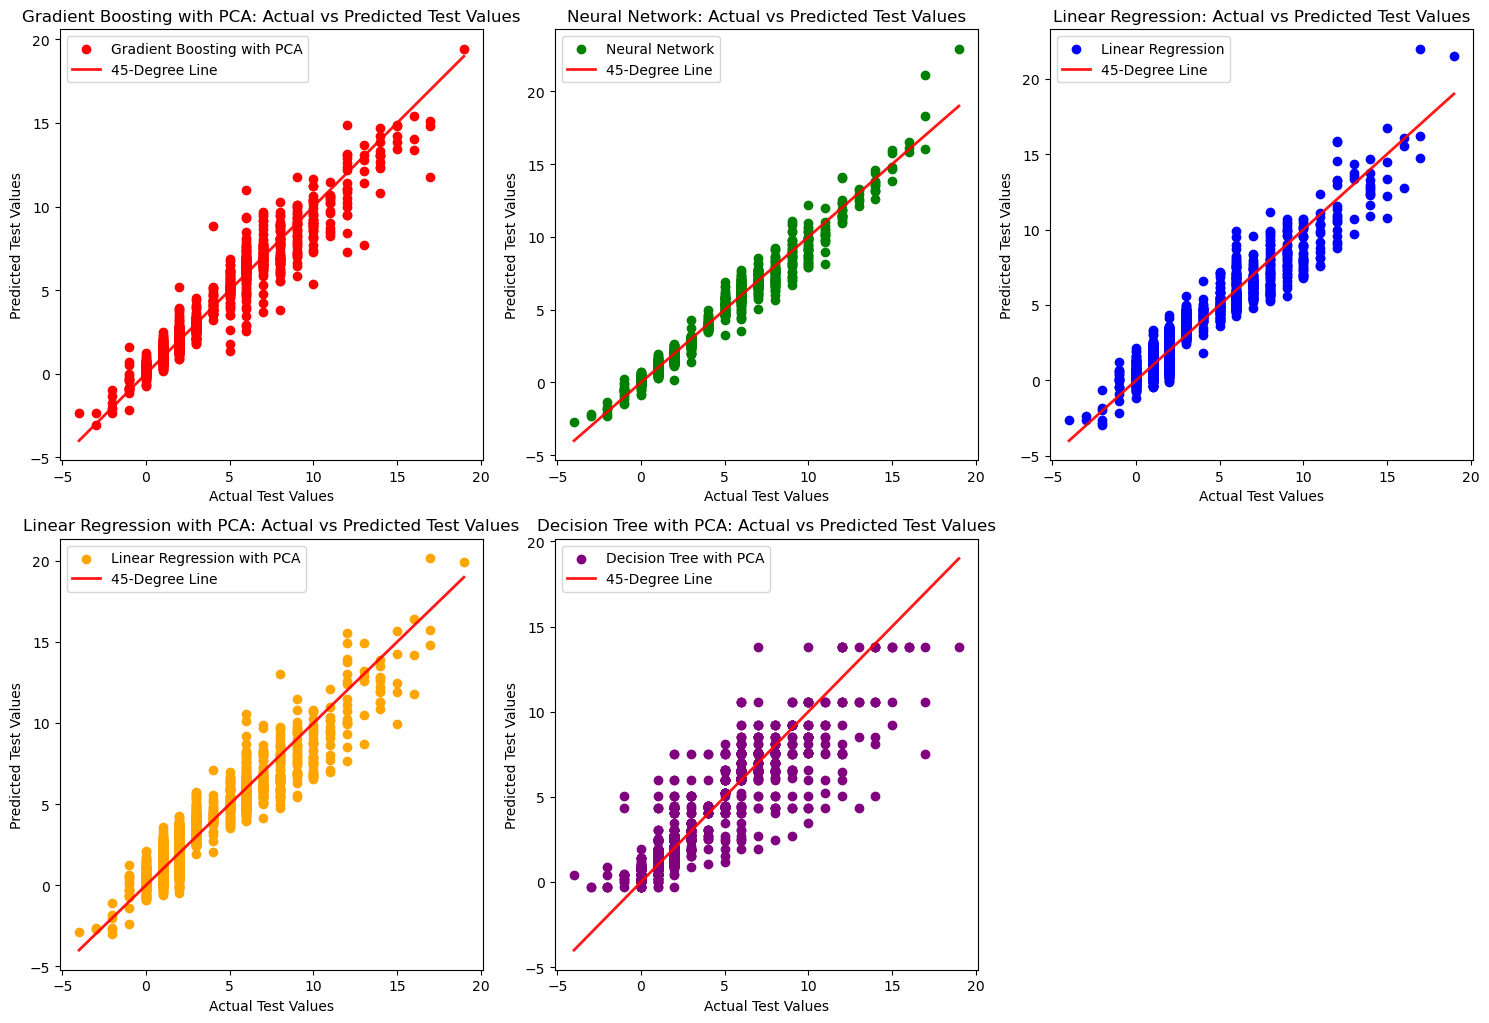

In [49]:
# Check for Linearity
# Define models with their predicted values and color for plotting
models = [
    ('Gradient Boosting with PCA', y_test_pred_gb, 'r'),
    ('Neural Network', y_test_pred_nn, 'g'),
    ('Linear Regression', pred_test_lr, 'b'),
    ('Linear Regression with PCA', pred_test_linpca, 'orange'),
    ('Decision Tree with PCA', y_test_pred_tree, 'purple')
]

# Create a figure with a size of 15x15 inches
plt.figure(figsize=(15, 15))

# Iterate over models to create subplots
for i, (model_name, y_pred, color) in enumerate(models, start=1):
    # Create subplots in a 3x3 grid
    plt.subplot(3, 3, i)
    
    # Scatter plot of actual vs predicted values
    plt.scatter(x=y_test, y=y_pred, color=color, label=model_name)
    
    # Add a 45-degree line for comparison
    xp = np.linspace(y_test.min(), y_test.max(), 100)
    plt.plot(xp, xp, alpha=0.9, linewidth=2, color='red', label='45-Degree Line')
    
    # Set labels and title for the subplot
    plt.xlabel('Actual Test Values')
    plt.ylabel('Predicted Test Values')
    plt.title(f'{model_name}: Actual vs Predicted Test Values')
    
    # Display legend for the subplot
    plt.legend()

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

From our scatter plots, we can see that the model that fits the test set most is the `Neural Network` model followed by the `Gradient Boost` model. The data points are very close to and concentrated around the line of best fit. This closeness to the line of best fit shows how closely the predicted values and test values fit together.

On the other hand, we can observe that the model with the worst fit is the `Decision Tree` model. This wide spread of the data points shows higher variability between our test and actual values suggesting that this model has less precise prediction capabilities.

Let's take a look at the Mean Absolute Error, R-squared and Adjusted R-squared of all our models to see what insights we can get from those.

In [50]:
model_final=model_comp.copy()
model_final

,Target variable,MAE on train,MAE on test,R-squared,Adjusted R-squared
Linear Regression,Total Points,0.642448,0.652247,0.908808,0.908536
Linear Regression with PCA,Total Points,0.702920,0.706291,0.892644,0.892312
Decision Tree with PCA,Total Points,0.616513,0.633652,0.847763,0.847292
Neural Network,Total Points,0.256083,0.267234,0.977720,0.977589
Gradient Boosting with PCA,Total Points,0.287150,0.400785,0.978870,0.978805


We can see some variation in the values of these parameters. To be able to translate them better and see how they compare between models, let's create a line plot to show the differences.

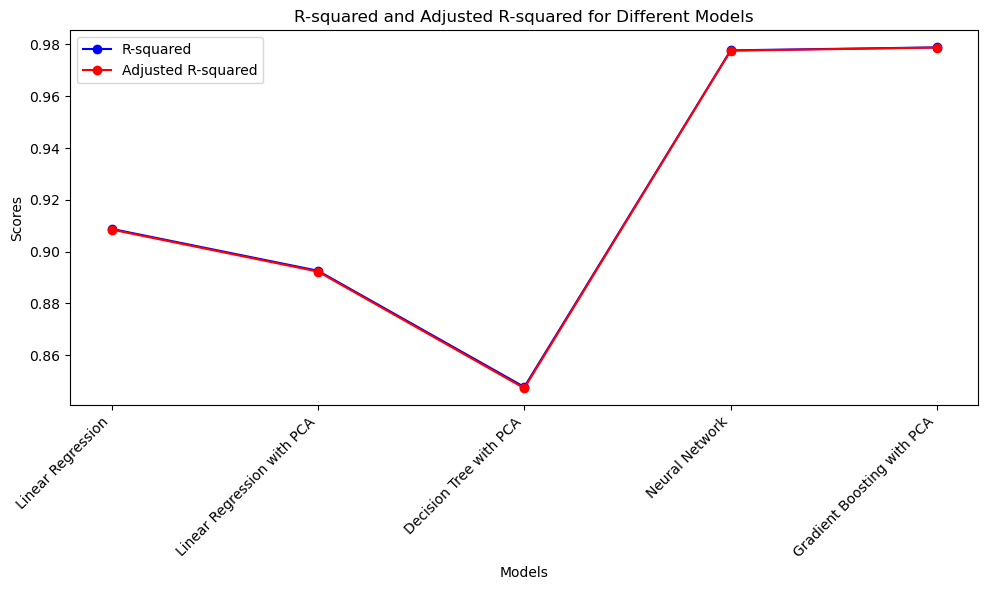

In [51]:
# Extract the relevant columns
models = model_comp.index
r_squared = model_comp['R-squared']
adjusted_r_squared = model_comp['Adjusted R-squared']

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(models, r_squared, marker='o', label='R-squared', color='b')
plt.plot(models, adjusted_r_squared, marker='o', label='Adjusted R-squared', color='r')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('R-squared and Adjusted R-squared for Different Models')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

Findings from R-squared and Adjusted R-squared:
- The R-squared and Adjusted R-squared of each model are almost equal. This suggest that the models are likely to generalize well and perform well with new and unseen data. This also indicates that the model does not overfit.
- The Neural Network models has the highiest Rsquared values followed by the Gradient Boost model meaning they exhibit the highiest performance when handling the test set and new unseen data.
- The least performing model is the Decision Tree Model with 80% of the variability in the dependent variable being explained by the independent variables in your model.

Now let's also take a look at the Mean Absolute Error. Ideally, the highier the MAE, the lower the performance of the model. Let's confirm this by creating a plot for the MAE of the test and train set.

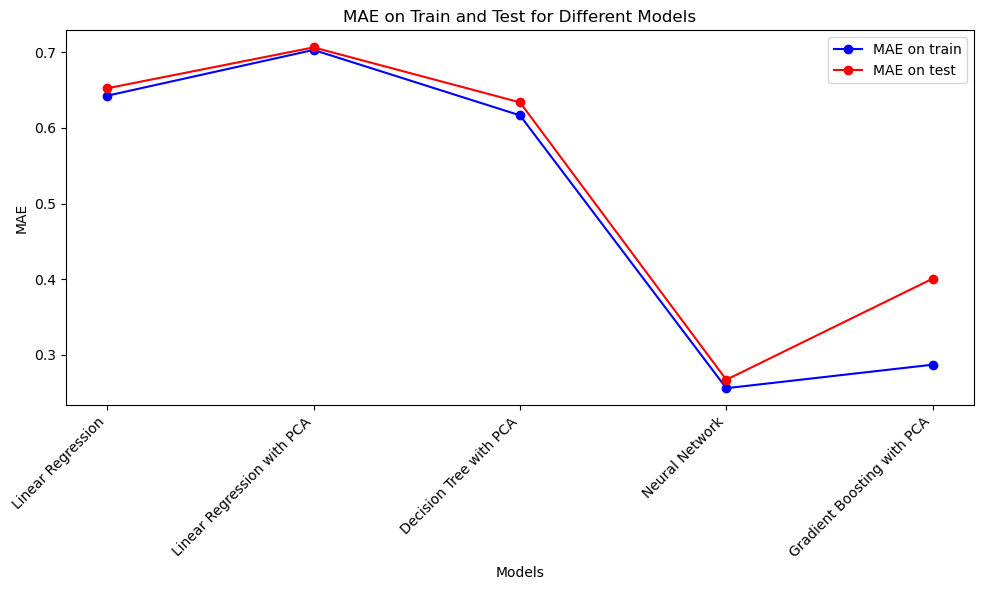

In [52]:
# Extract the relevant columns
models = model_comp.index
pmae_train = model_comp['MAE on train']
pmae_test = model_comp['MAE on test']

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(models, pmae_train, marker='o', label='MAE on train', color='b')
plt.plot(models, pmae_test, marker='o', label='MAE on test', color='r')

plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('MAE on Train and Test for Different Models')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

Findings from MAE of Test an Train set:
- Low MAE (close to zero) on both the train and test sets suggests that the model is making accurate predictions.
- The Neural Network model has the lowest MAE values followed by the Gradient Boost model meaning the average magnitude of errors between predicted values and actual values are significantly low which is good for our dataset.
- There is not a significant difference between MAE of test and train set for the Neural Network
- Although the Gradient Boosting has low MAE, the MAE of test and train sets are significantly different which is a sign of overfitting or underfitting.
- The model with the highiest MAE for test and train set is the Linear Regression model with PCA which means it is the second least performing out of all the models.


#### Conclusion:
- Neural Network model emerges as our most optimal model in predicting our target variable(`total_points`) based on its favorable MAE, R-squared and Adjusted R-squared values.
- The second pick from our models is the Gradient Boosting model based on performance. The model still shows signs of overfitting/underfitting so futher hyperparameter tuning will be needed to optimize the model.
- Feature performance varies between models so we could incorporate more models to see which features appear the most often.
- Since we are selecting the Neural Network as our optimal model, we can say that our most important features for predicting the target variable are `goals_scored` followed by `minutes` and `clean_sheets`.

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).